In [1]:
import pandas as pd
import nltk
from datafunction import open_discursos, token_clean, datos_discursos, procesamiento_palabras

# Modelo k-means
from sklearn.cluster import KMeans

# NLP
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
# Importar Bolsa de palabras dividida por temática
df_bolsa_div = pd.read_csv('Bolsa_palabras_div.csv')

# Reemplazar los nulos por 0
df_bolsa_div = df_bolsa_div.fillna(0)

# Obtener un diccionario del DataFrame de la bolsa de palabras dividida por temática
dict_bolsa_div = df_bolsa_div.to_dict('list')

In [3]:
# Lista limpia de palabras de cada tema
palabras_agrupadas = list()
for colum_temas in dict_bolsa_div.values():
    palabras=list()
    for palabra_tema in colum_temas:
        if palabra_tema != 0:
            palabras.append(palabra_tema)
    palabras_agrupadas.append(palabras)
            
# palabras_agrupadas   

In [4]:
# TF-IDF de cada palabra de la bolsa de palabras de forma individual
df_tfidf = procesamiento_palabras.palabra_tfidf(datos_discursos.discursos_bowf)
df_tfidf.head()

c:\Users\Ranchos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aborto,abuela,abuelas,abuelo,abuelos,abuso,abusos,acusaciones,adultos,agua,...,viejos,violaciones,violación,violar,violencia,violentos,vivienda,viviendas,víctimas,ética
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.031951,...,0.04597,0.0,0.000000,0.0,0.000000,0.0,0.038756,0.0,0.0,0.079162
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.042785,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.035781
2,0.000000,0.152175,0.0,0.0,0.0,0.076088,0.0,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.042172,0.0,0.000000,0.0,0.0,0.000000
3,0.122917,0.000000,0.0,0.0,0.0,0.033038,0.0,0.118515,0.000000,0.020002,...,0.00000,0.0,0.039505,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.024039,0.023471,...,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000


In [5]:
# Sumatoria de los valores de TF-IDF de las palabras que conforman un tema
df_agrupado= pd.DataFrame()
for ind,tema in enumerate(dict_bolsa_div.keys()):
    df_agrupado[tema] = df_tfidf[palabras_agrupadas[ind]].sum(axis=1)

df_agrupado.head()

,SANIDAD,NACIONALISMO,EDUCACIÓN,VIOLENCIA,FEMINISMO,CORRUPCIÓN,FAMILIA,JUSTICIA y LIBERTAD,CULTURA,ECONOMÍA,...,GRUPO,RELIGION,AGRAVIOS,SISTEMA PÚBLICO,INMIGRACIÓN,DESCONTENTO SOCIAL,IDEOLOGÍA NO PEYORATIVA,NOSTALGIA,PROGRESO,DEMOCRACIA
0,0.153781,1.273335,0.297650,0.162402,0.114493,0.099366,0.421266,0.183024,0.049372,1.174255,...,0.515339,0.000000,0.018414,0.156330,0.0,0.224004,0.066254,0.261264,0.880315,0.202981
1,0.091082,0.322897,0.059421,0.000000,0.165110,0.073952,0.034247,0.135191,0.022679,1.587645,...,0.745030,0.000000,0.126004,0.147346,0.0,0.204567,0.124950,0.075366,0.471511,0.041741
2,0.000000,0.572231,0.133951,0.670357,0.076088,0.421055,0.309731,0.329399,0.000000,0.598401,...,0.269585,0.000000,0.106195,0.080909,0.0,0.238546,0.000000,0.384105,0.620907,0.388420
3,0.263712,0.383836,0.796039,0.486589,0.216400,0.705484,0.169202,0.159196,0.179514,0.820103,...,0.159206,0.000000,0.167556,0.299270,0.0,0.046754,0.419728,0.318445,1.452868,0.195886
4,0.041913,0.118614,0.165199,0.167734,0.108817,0.115945,0.150811,0.265670,0.008191,0.119925,...,1.213555,0.629169,0.000000,0.062929,0.0,0.164710,0.009018,0.032138,0.311917,0.289902


## K-MEANS CON 5 CLUSTERS

In [6]:
# Modelo K-Means para 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state = 5)
kmeans_5.fit(df_agrupado)
kmeans_5.labels_

array([1, 1, 1, 4, 0, 0, 2, 2, 0, 4, 4, 4, 2, 1, 3, 0, 2, 3, 2, 4, 1, 1,
       1, 1])

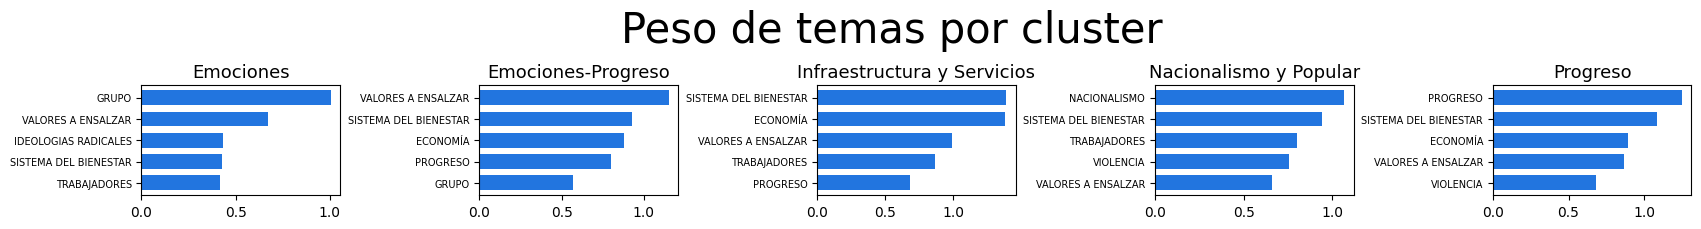

In [7]:
# DataFrame peso de cada tema dentro de cada cluster
df_centroides_5 = pd.DataFrame(data = kmeans_5.cluster_centers_, columns = [df_agrupado.columns]).T
df_centroides_5 = df_centroides_5.reset_index()
df_centroides_5.columns = ['TEMA', 'Emociones', 'Emociones-Progreso', "Infraestructura y Servicios", "Nacionalismo y Popular", "Progreso"]

# Gráfico de barras horizontales de los temas del cluster vs. peso
fig, axes= plt.subplots(1, 5, figsize=(20, 2))
fig.suptitle('Peso de temas por cluster', fontsize=30)

for ind, colum in enumerate(df_centroides_5.columns[1:]):
    x = df_centroides_5.sort_values([colum], ascending=False)[colum].head(5)
    y = df_centroides_5.sort_values([colum], ascending=False)['TEMA'].head(5)

    ax = axes[ind]
    ax.barh(y, x, height=0.7, color='#2275DF')
    ax.invert_yaxis()
    ax.tick_params(axis='y', labelsize=7)
    ax.set_title(colum, fontdict={"fontsize": 13})
    

plt.subplots_adjust(top=0.6, bottom=0.05, wspace=0.70, hspace=0.9)
plt.show()

In [8]:
# Actualización del DataFrame de discursos con los clusters del modelo K-means
df_discursos_cluster = datos_discursos.df_discursos.copy()
df_discursos_cluster['CLUSTER_5']= kmeans_5.labels_
df_discursos_cluster['NOMBRE_CLUSTER_5']= kmeans_5.labels_
df_discursos_cluster['NOMBRE_CLUSTER_5'].replace(0,'Emociones', inplace=True)
df_discursos_cluster['NOMBRE_CLUSTER_5'].replace(1,'Emociones-Progreso', inplace=True)
df_discursos_cluster['NOMBRE_CLUSTER_5'].replace(2,"Infraestructura y Servicios", inplace=True)
df_discursos_cluster['NOMBRE_CLUSTER_5'].replace(3,"Nacionalismo y Popular", inplace=True)
df_discursos_cluster['NOMBRE_CLUSTER_5'].replace(4,"Progreso", inplace=True)

# Gráfico Treemap de los clusters
fig = px.treemap(df_discursos_cluster, path=[px.Constant("Clusters de Discursos"), 'NOMBRE_CLUSTER_5', 'PAIS', 'COALICION'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(
    treemapcolorway = ['#BCDD8D','#2275DF', '#5CE1E6','#f9dc5c','#D12462'],
    margin = dict(t=50, l=25, r=25, b=25)
)
fig.show()

        PREDICCIÓNES

In [9]:
import gradio as gr

def prediccion_discurso(nombre_archivo):    
    # Cargamos un nuevo discurso que no forma parte del entrenamiento.
    discurso_txt = open_discursos.abrir_discurso('./', 'predic', nombre_archivo)
    discurso_token = token_clean.token(discurso_txt)
    discurso_clean = token_clean.clean(discurso_token)

    # Palabras del discurso que se encuentra en la bolsa de palabras
    palabras_predict = list()
    for palabra in discurso_clean:
        if palabra in datos_discursos.lista_palabras_bolsa:
            palabras_predict.append(palabra)

    # TF-IDF palabras del discurso
    tfidf_pre = procesamiento_palabras.palabra_tfidf([palabras_predict])

    # DataFrame con todas las palabras de la bolsa de palabas. Tendrán valor solo las que estén en el discurso
    df_predict = pd.DataFrame(columns=df_tfidf.columns)
    for colum in df_predict.columns:
        if colum in tfidf_pre.columns:
            df_predict[colum] = tfidf_pre[colum].values
        else:
            df_predict[colum] = float(0)

    # Suma de los pesos de las palabras de cada tema (agrupación por tema)
    df_tema= pd.DataFrame()
    for ind,tema in enumerate(dict_bolsa_div.keys()):
        df_tema[tema] = df_predict[palabras_agrupadas[ind]].sum(axis=1)

    # Predicción del cluster
    etiqueta = ['Emociones','Emociones-Progreso',"Infraestructura y Servicios","Nacionalismo y Popular","Progreso"]
    num_cluster = kmeans_5.predict(df_tema)[0]
     
    return etiqueta[num_cluster]

gr.Interface(fn=prediccion_discurso, inputs="text", outputs="text").launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


c:\Users\Ranchos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

c:\Users\Ranchos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

c:\Users\Ranchos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

